In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=np.linspace(0,50,501)

In [4]:
y=np.sin(x)

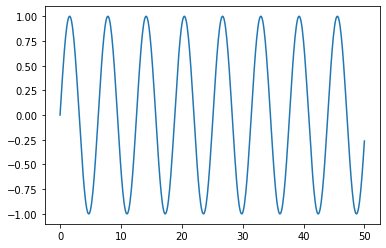

In [5]:
plt.plot(x,y)

In [7]:
df=pd.DataFrame(data=y,index=x,columns=['sine'])

In [9]:
test_percent = 0.1

In [11]:
test_point=np.round(len(df)*test_percent)

In [14]:
test_index = int(len(df)-test_point)
test_index

451

In [15]:
train=df.iloc[:test_index]
test=df.iloc[test_index:]

In [17]:
train.shape[0]+test.shape[0]

501

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 | 

In [58]:
length=50
batch_size=1

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [54]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [62]:
n_features=1

In [63]:
model = Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/5
401/401 [==============================] - 7s 16ms/step - loss: 0.0067
Epoch 2/5
401/401 [==============================] - 6s 14ms/step - loss: 1.3234e-04
Epoch 3/5
401/401 [==============================] - 6s 15ms/step - loss: 2.3815e-04
Epoch 4/5
401/401 [==============================] - 6s 14ms/step - loss: 1.5591e-04
Epoch 5/5
401/401 [==============================] - 5s 13ms/step - loss: 0.0011


In [66]:
losses=pd.DataFrame(model.history.history)

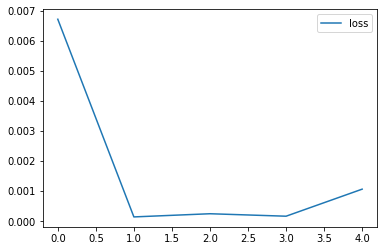

In [67]:
losses.plot()

In [69]:
first_eval_batch = scaled_train[-length:]
first_eval_batch=first_eval_batch.reshape((1,length,n_features))

In [70]:
model.predict(first_eval_batch)

array([[0.9479417]], dtype=float32)

In [71]:
scaled_test[0]

array([0.94955134])

In [116]:
predictions=[]
for i in range(len(test)):
    eval_batch = np.concatenate([scaled_train[(-length+i):],scaled_test[:i]])
    eval_batch = eval_batch.reshape(1,length,n_features)
    predictions.append(model.predict(eval_batch))

In [117]:
predictions

[array([[0.9479417]], dtype=float32),
 array([[0.9679859]], dtype=float32),
 array([[0.98317343]], dtype=float32),
 array([[0.9933494]], dtype=float32),
 array([[0.9984412]], dtype=float32),
 array([[0.9984483]], dtype=float32),
 array([[0.993433]], dtype=float32),
 array([[0.98350525]], dtype=float32),
 array([[0.9688138]], dtype=float32),
 array([[0.9495417]], dtype=float32),
 array([[0.92590284]], dtype=float32),
 array([[0.898143]], dtype=float32),
 array([[0.86653864]], dtype=float32),
 array([[0.8313906]], dtype=float32),
 array([[0.7930199]], dtype=float32),
 array([[0.75176287]], dtype=float32),
 array([[0.7079698]], dtype=float32),
 array([[0.66200936]], dtype=float32),
 array([[0.6142751]], dtype=float32),
 array([[0.56519145]], dtype=float32),
 array([[0.51521796]], dtype=float32),
 array([[0.4648482]], dtype=float32),
 array([[0.41460732]], dtype=float32),
 array([[0.36504537]], dtype=float32),
 array([[0.31672707]], dtype=float32),
 array([[0.27022246]], dtype=float32),
 a

In [86]:
import seaborn as sns

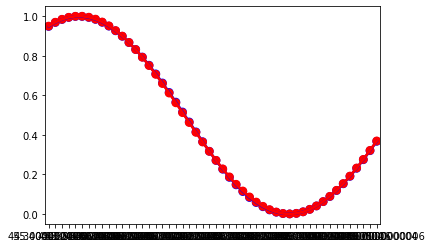

In [120]:
sns.pointplot(x=df.index[test_index:],y=np.array(predictions).reshape(len(test)),color='b')
sns.pointplot(x=df.index[test_index:],y=np.array(scaled_test[:len(test)]).reshape(len(test)),color='r')

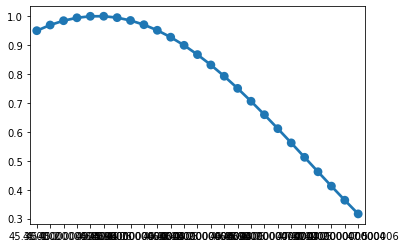

In [113]:
sns.pointplot(x=df.index[test_index:len(df)-(len(predictions))],y=np.array(scaled_test[:25]).reshape(25))

In [124]:
true_predictions = scaler.inverse_transform(np.array(predictions).reshape((1,len(test))))

In [125]:
true_predictions

array([[ 0.895878  ,  0.93596613,  0.9663409 ,  0.9866926 ,  0.99687624,
         0.9968904 ,  0.98685986,  0.96700454,  0.93762183,  0.89907795,
         0.8518006 ,  0.7962814 ,  0.7330732 ,  0.6627777 ,  0.58603686,
         0.50352347,  0.415938  ,  0.32401788,  0.22855014,  0.13038363,
         0.03043744, -0.07030129, -0.17078222, -0.26990533, -0.36654115,
        -0.45954964, -0.5478193 , -0.6302943 , -0.7060179 , -0.7741644 ,
        -0.83405876, -0.8851832 , -0.9271697 , -0.9597715 , -0.982839  ,
        -0.9962883 , -1.0000852 , -0.99423456, -0.97878313, -0.9538282 ,
        -0.91953164, -0.87613696, -0.82398754, -0.7635341 , -0.6953455 ,
        -0.6201079 , -0.5386133 , -0.45174828, -0.36046404, -0.2657505 ]],
      dtype=float32)

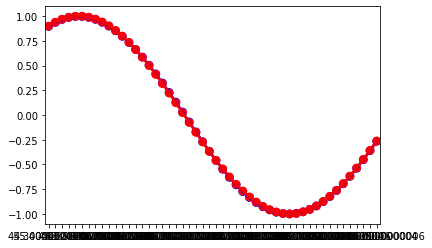

In [129]:
sns.pointplot(x=df.index[test_index:],y=np.array(true_predictions).reshape(len(test)),color='b')
sns.pointplot(x=df.index[test_index:],y=np.array(test['sine']).reshape(len(test)),color='r')

In [135]:
test['predictions']=true_predictions.reshape(len(test))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<Figure size 864x576 with 0 Axes>

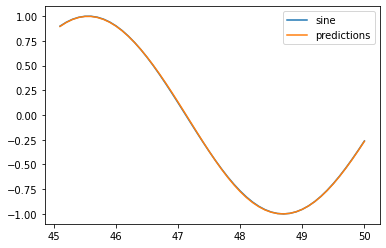

In [137]:
plt.figure(figsize=(12,8))
test.plot()

In [139]:
from tensorflow.keras.callbacks import EarlyStopping

In [140]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [142]:
length=49
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [144]:
model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [145]:
model.fit_generator(generator,epochs=30,validation_data=validation_generator,callbacks=[early_stop])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 402 steps, validate for 1 steps
Epoch 1/30
402/402 [==============================] - 12s 30ms/step - loss: 0.0228 - val_loss: 2.3167e-04
Epoch 2/30
402/402 [==============================] - 10s 25ms/step - loss: 1.7265e-04 - val_loss: 1.0250e-05
Epoch 3/30
402/402 [==============================] - 10s 24ms/step - loss: 1.8384e-04 - val_loss: 1.0081e-05
Epoch 4/30
402/402 [==============================] - 9s 21ms/step - loss: 2.1411e-04 - val_loss: 3.2959e-05
Epoch 5/30
402/402 [==============================] - 8s 21ms/step - loss: 5.8684e-04 - val_loss: 5.4683e-04


In [148]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [153]:
len(test_predictions[0])

1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


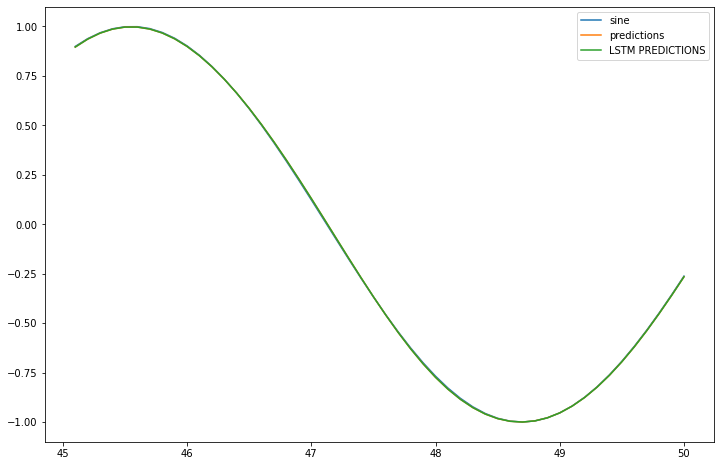

In [155]:
true_predicitons = scaler.inverse_transform(test_predictions)
test['LSTM PREDICTIONS'] = true_predictions.reshape(len(test))
test.plot(figsize=(12,8))

In [156]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [157]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=batch_size)

In [158]:
model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [159]:
model.fit_generator(generator,epochs=6)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 452 steps
Epoch 1/6
452/452 [==============================] - 14s 32ms/step - loss: 0.0091
Epoch 2/6
452/452 [==============================] - 12s 26ms/step - loss: 1.2843e-04
Epoch 3/6
452/452 [==============================] - 12s 26ms/step - loss: 4.0794e-04
Epoch 4/6
452/452 [==============================] - 11s 23ms/step - loss: 9.8100e-05
Epoch 5/6
452/452 [==============================] - 10s 22ms/step - loss: 1.7715e-04
Epoch 6/6
452/452 [==============================] - 10s 22ms/step - loss: 2.6668e-04


In [166]:
forecast=[]
first_eval_batch=scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)
for i in range(25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    

In [167]:
forecast=scaler.inverse_transform(forecast)

In [168]:
forecast_index = np.arange(50.1,52.6,step=0.1)

In [170]:
len(forecast)

25

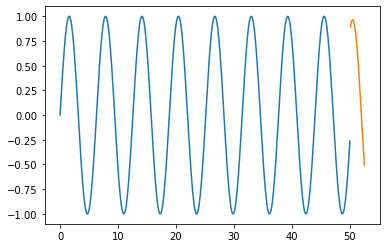

In [172]:
plt.plot(df.index,df['sine'])
plt.plot(forecast_index,forecast)